### KNN (K Nearest Neighbors)

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [13]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(['target'], axis='columns')
y = df.target


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [25]:
len(X_train)

1347

In [26]:
len(X_test)

450

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [29]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [31]:
knn.score(X_test, y_test)

0.9711111111111111

In [35]:
model_params = {
    'k_neighbour': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1,5,10]
        }
    }
    
}

In [36]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

In [38]:
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,k_neighbour,0.964393,{'n_neighbors': 1}


In [40]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 41,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 38]], dtype=int64)

Text(42.0, 0.5, 'Truth')

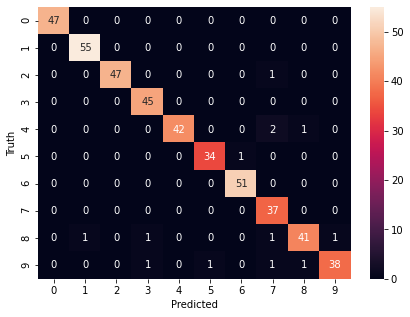

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      0.98      0.99        56
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        47
           4       0.93      1.00      0.97        42
           5       0.97      0.97      0.97        35
           6       1.00      0.98      0.99        52
           7       1.00      0.88      0.94        42
           8       0.91      0.95      0.93        43
           9       0.90      0.97      0.94        39

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

